In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd

print(pd.__version__)
!python --version

1.5.3
Python 3.8.5


In [3]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [3]:
print(mnist.DESCR) # o dataset normalmente fica em cache em $HOME/scikit_learn_data. No meu caso no windows: C:\Users\josen\scikit_learn_data

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
mnist.keys() #dict python

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)
#X é um dataframe pandas, y é uma serie pandas

(70000, 784)
(70000,)


In [6]:
# Um outro dataset mais simples
#from sklearn.datasets import load_digits
#df = load_digits()
#print(df.DESCR)

In [7]:
print(y.value_counts()) # para ver quantas amostras o dataset possui por classe

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
some_digit = X.loc[0,:] #X[0] - será usado mais a frente na predição
# converter de serie pandas para numpy (na verdade já vê a serie como um array)
some_digit_np = some_digit.to_numpy()
some_digit_image = some_digit_np.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

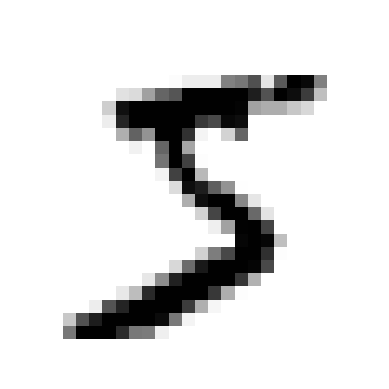

In [8]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')

In [9]:
y[0] #verifica se y[0] é o dígito 5 mesmo

'5'

In [7]:
import numpy as np
# como o label é uma string, vamos converter para número, pois os algoritmos ML trabalham com números
y = y.astype(np.uint8) # unsigned int de 1 byte, o famoso unsigned char do C

In [8]:
# o dataset MNIST já é separado em conjunto de treino e teste, onde o conjunto de treino está embaralhado (shuffle),
# o que é bom neste caso

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
print(y_test.value_counts())

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: class, dtype: int64


In [13]:
# vamos exemplificar treinando um classificador binário para reconhecer apenas o número 5, portanto, classes 5 e não 5
y_train_5 = (y_train == 5) # 1(true) para o 5, 0(false) para os demais
y_test_5 = (y_test == 5)

In [14]:
"""
escolher um classificador (knn, svm, naivebayes, nn, sgd, decisiontree etc.). Vamos usar o SGD (stochastic gradient descent), um
classificador que lida bem com conjunto grande de dados e lida com instâncias de treinamento uma por vez, de forma independente, sendo
boa opção para aprendizado online. Em sua configuração padrão é um modelo linear regularizado (L2) - SVM
""" 

from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier(random_state=42) #se quiser reproduzir os resultados
model_sgd.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
# vamos agora usar para detectar imagens com o número alvo
model_sgd.predict([some_digit])

c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

#### Validação cruzada

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_sgd, X_train, y_train_5, cv=5,scoring='accuracy')

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

##### Vamos usar o cross_val_predict para obter predições feitas em cada teste de fold na validação cruzada e usar isto para uma matriz de confusão

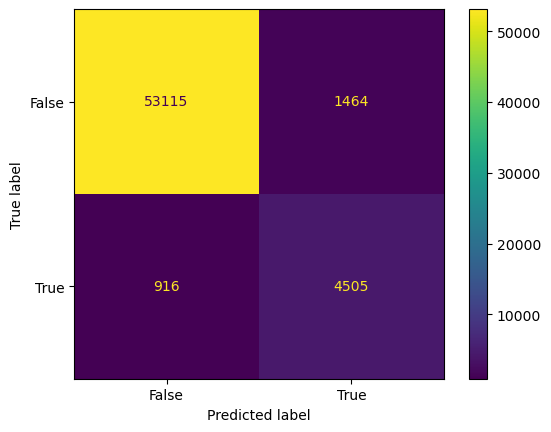

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model_sgd, X_train, y_train_5, cv=5)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_train_5, y_pred=y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_sgd.classes_)
disp.plot()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_train_5,y_train_pred))

              precision    recall  f1-score   support

       False       0.98      0.97      0.98     54579
        True       0.75      0.83      0.79      5421

    accuracy                           0.96     60000
   macro avg       0.87      0.90      0.88     60000
weighted avg       0.96      0.96      0.96     60000



In [18]:
y_scores = model_sgd.decision_function([some_digit])
print(y_scores)

# definindo um threshold = 0 (padrão do SGDClassifier com predict())
thresh = 0

y_some_digit_pred = (y_scores > thresh)
print(y_some_digit_pred) # TRUE

# aumentando o threshold para 8000 dará False, diminuindo a revocação (o classificador perde esta imagem de 5)
thresh = 3000
y_some_digit_pred = (y_scores > thresh)
print(y_some_digit_pred) # FALSE


[2164.22030239]
[ True]
[False]


c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


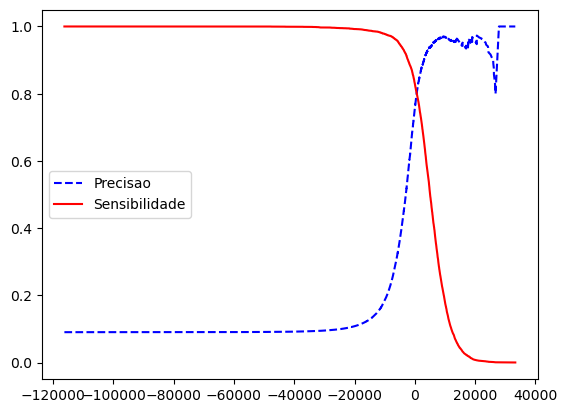

In [20]:
y_scores = cross_val_predict(model_sgd, X_train, y_train_5, cv=5, method='decision_function')

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precisao')
    plt.plot(thresholds, recalls[:-1], 'r-', label='Sensibilidade')
    plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0, 0.5, 'Precision')

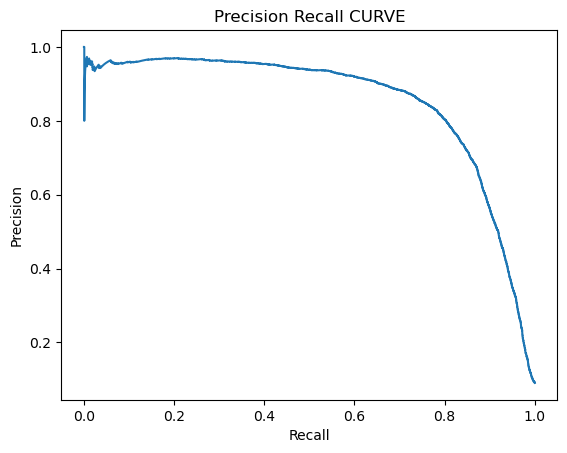

In [25]:
plt.plot(recalls, precisions)
plt.title('Precision Recall CURVE')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [26]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision) #3045

y_train_pred_90 = (y_scores >= threshold_90_precision)
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred_90)) #90%
print(recall_score(y_train_5, y_train_pred_90)) #65%

3045.9258227053647
0.9002016129032258
0.6589190186312488


##### Curva ROC

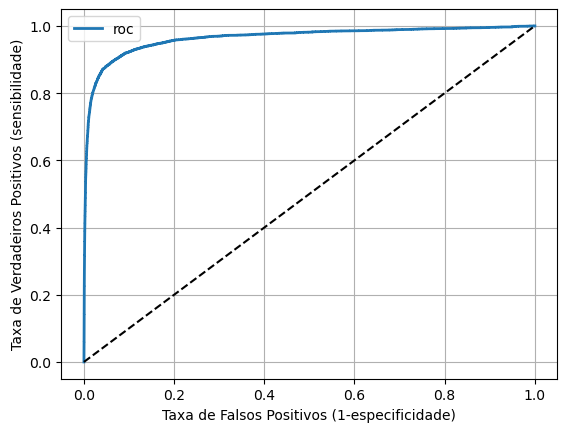

In [27]:
from sklearn.metrics import roc_curve
tfp, tvp, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(tfp, tvp, label='roc'):
    plt.plot(tfp,tvp,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.legend()
    plt.grid()
    plt.xlabel('Taxa de Falsos Positivos (1-especificidade)')
    plt.ylabel('Taxa de Verdadeiros Positivos (sensibilidade)')

plot_roc_curve(tfp, tvp)
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9648211175804801

##### Vamos comparar com um Random Forest? Embora Random Forest não tenha decision_function, tem predict_proba (probabilidade de pertença de cada classe). Pode-se usar no _predict() o method='predict_proba'

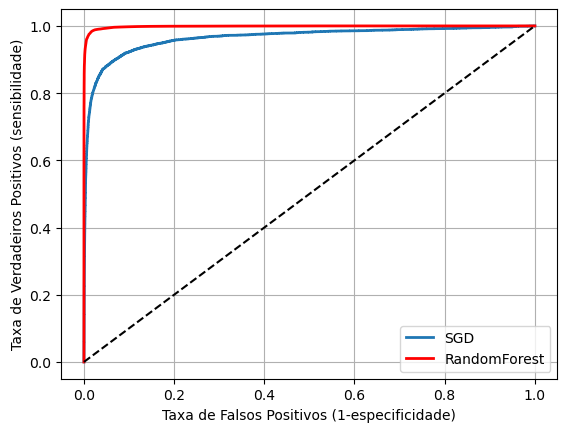

In [29]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

y_probas_rf = cross_val_predict(model_rf, X_train, y_train_5, cv=5, method='predict_proba')

y_scores_rf = y_probas_rf[:,1] # ou seja as probabilidades da classe positiva (5)
tfp_rf, tvp_rf, thresholds_rf = roc_curve(y_train_5, y_scores_rf)

def plot_roc_curve(tfp_1, tvp_1, tfp_2, tvp_2, label_1, label_2):
    plt.plot(tfp_1,tvp_1, linewidth=2, label=label_1)
    plt.plot(tfp_2,tvp_2, 'r', linewidth=2, label=label_2)
    plt.plot([0,1],[0,1],'k--')
    plt.legend()
    plt.grid()
    plt.xlabel('Taxa de Falsos Positivos (1-especificidade)')
    plt.ylabel('Taxa de Verdadeiros Positivos (sensibilidade)')

plot_roc_curve(tfp, tvp, tfp_rf, tvp_rf, 'SGD', 'RandomForest')
plt.show()

In [30]:
roc_auc_score(y_train_5, y_scores_rf)

0.998402186461512

### Classificação MULTICLASSE OU MULTINOMIAIS (distinguem mais de 2 classes). Estão presentes por exemplo no problema de detecção de objetos com aprendizagem profunda, onde na mesma imagem tem-se objetos de classes distintas (ex. pessoa, carro, semáforo, bicicleta etc.)  e é necessário predizer os rótulos das classes dos objetos presentes. Na outra etapa deve-se também predizer os retângulos demarcadores de cada objeto (bounding box), ou seja, suas 4 coordenadas. Neste caso é um problema de regressão
<img src='img/exemplo_detect.png'>

#### Embora algoritmos como SGD (gradiente descendente estocástico), RandomForest (florestas aleatórias), Naive Bayes entre outros lidem com multiclasse nativamente, outros são estritamente binários, como regressão logística, SVM etc. mas existem técnicas para usar os binários. A primeira técnica é a OvR (one versus-the-rest). No caso do MNIST com 10 classes, é um classificador binário para cada dígito (detector 0, detector 1, detector 2 etc.). Obtém-se o score de decisão de cada classificador binário e o maior score é a classe predita.
#### Já o OvO (one-versus-one) são classificadores binários aos pares (distinguir 0 e 2, 1 e 2 etc.), sendo necessário N x (N-1)/2 classificadores. No caso do MNIST 45 classificadores. A vantagem é ser mais rápido, pois cada um só precisa ser treinado em seu subconjunto.

In [31]:
from sklearn.svm import SVC
svm_model = SVC() #usa OvO
svm_model.fit(X_train, y_train) #todo o conjunto
svm_model.predict([some_digit])


c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [33]:
some_digit_scores = svm_model.decision_function([some_digit])
some_digit_scores #10 scores por instância

c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [34]:
np.argmax(some_digit_scores)

5

In [35]:
svm_model.classes_ #coincidiu com a classe 5!

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Vamos forçar a usar a técnica OvR com o SVM

In [36]:
from sklearn.multiclass import OneVsRestClassifier
svm_ovr_model = OneVsRestClassifier(SVC()) #passa no construtor o algoritmo classificador, não precisa ser binário
svm_ovr_model.fit(X_train, y_train) #todo o conjunto
svm_ovr_model.predict([some_digit])

print(len(svm_ovr_model.estimators_))

10


c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

In [37]:
# Se usar o SGDClassifier, não roda OvR ou OvO, pode usar direto pois lida com multiclasse
model_sgd.fit(X_train, y_train)
model_sgd.predict([some_digit])

c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [38]:
model_sgd.decision_function([some_digit])

c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [42]:
# avaliando
cross_val_score(model_sgd, X_train, y_train, scoring='accuracy', cv=3, n_jobs=-1)

array([0.87365, 0.85835, 0.8689 ])

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(model_sgd, X_train_scaled, y_train, scoring='accuracy', cv=3, n_jobs=-1)

array([0.8983, 0.891 , 0.9018])

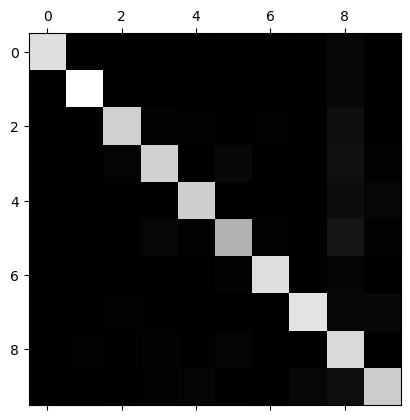

In [44]:
y_train_pred = cross_val_predict(model_sgd, X_train_scaled, y_train, cv=3, n_jobs=-1)

conf_mx = confusion_matrix(y_train, y_train_pred)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

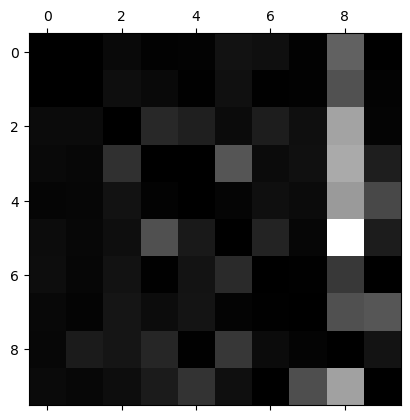

In [45]:
# parece haver confusão do 3 com o 5
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums # dividir cada valor na matriz pelo número de imagens na classe correspondente (ERRO)

np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [47]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

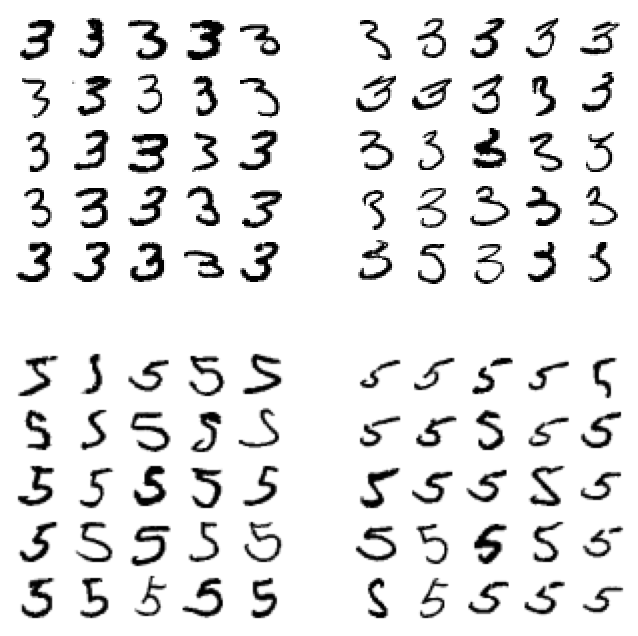

In [48]:
cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# 5x5 à esquerda algarismos classificados como 3 e à direita como 5
# Os erros se devem ao SGD simples, linear, os 3s e 5s diferem só em alguns pixels

# classificador sensível à mudança e à rotação da imagem. Pode-se corrigir para que estejam bem centralizadas, sem muita rotação

#### E por último classificação multirótulo e multioutput (mais de 2 rótulos). Para multirótulo, suponha que queremos gerar a saída de várias classes para cada instância, por exemplo, queremos reconhecer três rostos em uma foto: Pedro, Maria, João. Uma foto com Pedro e João teria como saída [1,0,1]. Neste caso, cada classe é binária, é Pedro ou não é Pedro. Na classificação multioutput esta é uma generalização da multirótulo, e cada rótulo pode ser multi classeado

In [9]:
# Vamos classificar imagens de dígitos maiores ou iguais a 7 e que sejam ímpares
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1) #impar
y_multilabel = np.c_[y_train_large, y_train_odd]

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_multilabel)

model_knn.predict([some_digit])

c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [14]:
# Avaliar métrica do classificador. Pode ser qualquer métrica, vamos usar o F1 score por classe
from sklearn.model_selection import cross_val_predict
y_train_knn_pred = cross_val_predict(model_knn, X_train, y_multilabel, cv=3, n_jobs=-1)

from sklearn.metrics import f1_score
f1_score(y_multilabel, y_train_knn_pred, average='macro') # ou average='weighted' se as classes são desbalanceadas e ele usa o conjunto suporte para ponderar

0.976410265560605